# FINAL PREDICTION - EMAIL SPAM

## Importing Libraries

In [1]:
import joblib as jb
encode_model=jb.load('files/train/model/train_encode_model.pkl')
feature_selection=jb.load('files/train/model/feature_selected.pkl')
model=jb.load('files/train/model/xgb.pkl')

In [2]:
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

In [3]:
def flow(x_path,y_path):
    #read
    x_test=pd.read_csv(x_path)
    y_test=pd.read_csv(y_path)
    
    #encode
    encode_data=encode_model.transform(x_test)
    encode_data=pd.DataFrame(encode_data,columns=x_test.columns)
    y_test=y_test.replace({'spam':0,'not spam':1})
    
    #feature_selection
    feature_selected=encode_data[feature_selection]
    
    #predict
    y_pred=pd.DataFrame(model.predict(feature_selected))
    
    #merics
    report=classification_report(y_pred,y_test)
    cm=confusion_matrix(y_pred,y_test)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm)
    
    return y_pred,report,disp

In [4]:
y_pred,report,disp=flow('test data/x.csv','test data/y.csv')

In [5]:
y_pred

,0
0,1
1,0
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [6]:
print(report)

              precision    recall  f1-score   support

           0       0.20      1.00      0.33         1
           1       1.00      0.84      0.91        25

    accuracy                           0.85        26
   macro avg       0.60      0.92      0.62        26
weighted avg       0.97      0.85      0.89        26



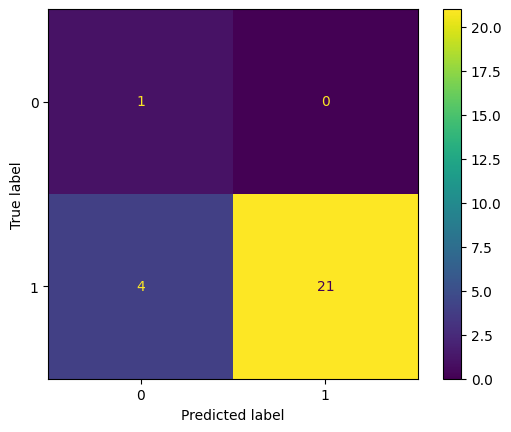

In [7]:
disp.plot()